# Radius of Gyration

The [radius of gyration](https://neurosnap.ai/blog/post/understanding-the-radius-of-gyration-in-protein-design-bioinformatics/66fb0ecc5a941760bf4b5138) is a measure that describes the distribution of a protein’s atoms around its center of mass. In simpler terms, it gives us a sense of how spread out a protein’s structure is. Mathematically, it’s the root-mean-square distance of all the atoms from the center of mass of the protein. If we think of proteins as being made up of many small points (atoms), the radius of gyration tells us how far these points are, on average, from the center.

For proteins, this measure is crucial because it helps quantify the overall shape and compactness of a folded protein structure. 

- A protein with a smaller radius of gyration is more compact, while a larger radius indicates a more extended or less folded structure.

Mathematically, the radius of gyration $R_g$ for a protein, represented as a collection of  atoms, is calculated using the following formula:

$$ R_g = \sqrt{\frac{1}{N} \sum_{i=1}^{N} r_i^2} $$

- $R_g$ is the radius of gyration.
- $N$ is the number of atoms in the protein.
- $r_i$ is the distance of each atom from the center of mass of the protein.

In [ ]:
import numpy as np
import pandas as pd
from Bio import PDB

def radius_of_gyration(structure_file_path):
    '''Calculates the radius of gyration using Bio.PDB'''

    # The model is parsed using the PDBParser
    parser = PDB.PDBParser(QUIET = True)
    structure = parser.get_structure("proteins", structure_file_path)
    model = structure[0]
    chain_A = model["A"] # The chain of the binder
    atoms = chain_A.get_atoms()
    
    # Get the coordinates of the atoms
    coords = np.array([atom.get_coord() for atom in atoms])
    # Calculate the center of mass
    com = np.mean(coords, axis=0)
    # Calculate the distances from the center of mass
    distances_from_com = np.linalg.norm(coords - com, axis=1)
    # Calculate the radius of gyration
    n_atoms = len(distances_from_com)
    rog_value = np.sqrt(np.sum(distances_from_com**2) / n_atoms)
    return rog_value

def get_num_residues(structure_file_path):
    '''Returns the number of residues in the structure'''
    
    # The model is parsed using the PDBParser
    parser = PDB.PDBParser(QUIET = True)
    structure = parser.get_structure("proteins", structure_file_path)
    model = structure[0]
    chain_A = model["A"] # The chain of the binder
    # Get the number of residues in chain A
    # This assumes that the chain is not empty and contains residues
    num_residues = len([residue for residue in chain_A.get_residues()])
    return num_residues

# List to store results
data = []
n_models = 20

# Iterate over the files
for i in range(1,n_models +1):
    pdb_file = f"PD1_binders/pd1_binder_{i}.pdb"  # Construct the file name
    rog_value = radius_of_gyration(pdb_file)      # Compute Rog
    num_residues = get_num_residues(pdb_file)     # Get number of residues
    data.append({"PDB_file": pdb_file.split('/')[1],"n_model": i, "Radius_of_gyration": rog_value, "Num_residues": num_residues})

# Create a pandas DataFrame
data = pd.DataFrame(data)

#Save to a CSV file
#data.to_csv("radius_of_gyration_results.csv", index=False)

# Display the DataFrame
data = data.sort_values(by="Radius_of_gyration", ascending=True, ignore_index=True)
data

,PDB_file,n_model,Radius_of_gyration,Num_residues
0,pd1_binder_17.pdb,17,10.732103,52
1,pd1_binder_3.pdb,3,11.547195,83
2,pd1_binder_13.pdb,13,11.680013,66
3,pd1_binder_8.pdb,8,11.924329,84
4,pd1_binder_14.pdb,14,12.244280,88
5,pd1_binder_15.pdb,15,12.613170,50
6,pd1_binder_1.pdb,1,13.152371,88
7,pd1_binder_9.pdb,9,13.319784,96
8,pd1_binder_11.pdb,11,13.662414,56
9,pd1_binder_19.pdb,19,13.713561,98


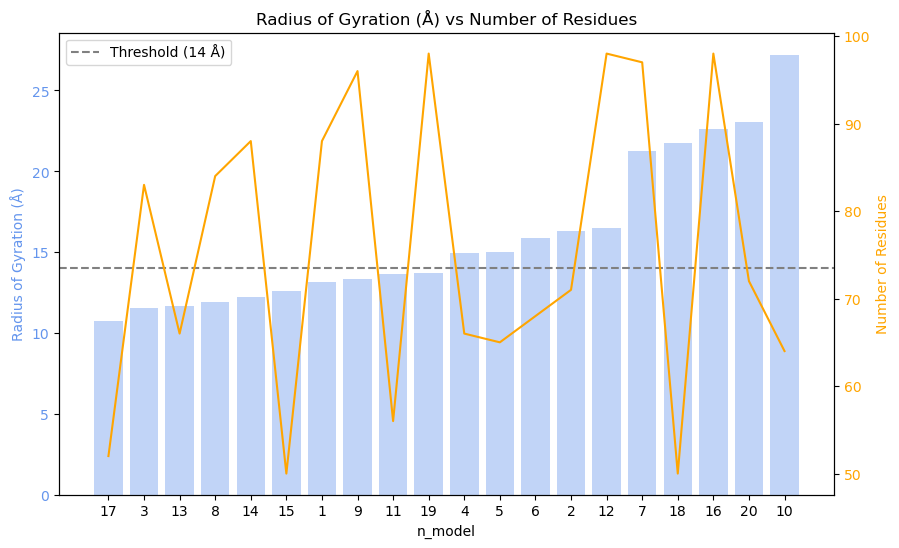

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Radius_of_Gyration as a bar graph
ax1.bar(data.index, data['Radius_of_gyration'], color='cornflowerblue',alpha=0.4)
ax1.set_xlabel('n_model')
ax1.set_ylabel('Radius of Gyration (Å)', color='cornflowerblue')
ax1.tick_params(axis='y', labelcolor='cornflowerblue')
ax1.set_xticks(data.index)
ax1.set_xticklabels(data['n_model'])

# Threshold line for Radius of Gyration
plt.axhline(y = 14, color = 'gray', linestyle='--', label='Threshold (14 Å)')
plt.legend()
# Plot Num_residues as a line graph
ax2 = ax1.twinx()  
ax2.plot(data.index, data['Num_residues'], color='orange')
ax2.set_ylabel('Number of Residues', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


# Set the title
plt.title('Radius of Gyration (Å) vs Number of Residues')


#plt.savefig("radius_of_gyration.png", dpi=600)
plt.show()